<a href="https://colab.research.google.com/github/yashi-2004/CIFAR-10-IMAGE-CLASSIFICATION/blob/main/cnn_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

100%|██████████| 170M/170M [00:02<00:00, 66.5MB/s]


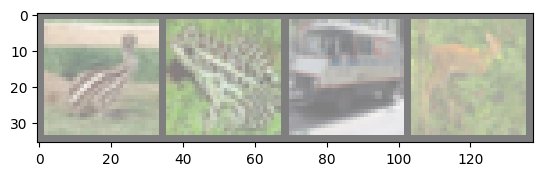

bird frog truck deer


In [2]:
# Define transformation
transform = transforms.ToTensor()

# Load data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True)

# Class names
classes = train_data.classes

# Function to unnormalize and show image
def imshow(img):
    img = img / 2 + 0.5  # (if normalized in original transform)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get one batch
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(4)))


In [3]:
# Recommended Training Transform (with Data Augmentation)
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [4]:
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True, num_workers=2)

In [5]:
image, label = train_data[0]

In [6]:
image

tensor([[[-0.7020, -0.3176, -0.1686,  ..., -0.0510, -0.2627, -1.0000],
         [-0.5373, -0.2000, -0.0039,  ..., -0.4118, -0.4745, -1.0000],
         [-0.3412, -0.1373,  0.0118,  ..., -0.7255, -0.7490, -1.0000],
         ...,
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[-0.8431, -0.5765, -0.5059,  ..., -0.3333, -0.5137, -1.0000],
         [-0.7490, -0.4902, -0.3804,  ..., -0.6314, -0.6706, -1.0000],
         [-0.5843, -0.4275, -0.3569,  ..., -0.9216, -0.8980, -1.0000],
         ...,
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[-0.9686, -0.8039, -0.7804,  ..., -0.6235, -0.7255, -1.0000],
         [-0.9137, -0.7333, -0.6941,  ..., -0

In [7]:
image.shape

torch.Size([3, 32, 32])

In [8]:
image.size()

torch.Size([3, 32, 32])

In [9]:
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 12, 5)
        self.bn1 = nn.BatchNorm2d(12)
        self.pool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(12, 24, 5)
        self.bn2 = nn.BatchNorm2d(24)

        self.fc1 = nn.Linear(24 * 5 * 5, 120)
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(120, 84)
        self.dropout2 = nn.Dropout(0.2)

        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = torch.flatten(x, 1)
        x = self.dropout1(F.relu(self.fc1(x)))
        x = self.dropout2(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x


In [11]:
net = NeuralNetwork()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [12]:
train_losses = []
val_losses = []

In [13]:
num_epochs = 30

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")

    net.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # --- Validation ---
    net.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = net(inputs)
            loss = loss_function(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = val_loss / len(test_loader)
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # --- Logging ---
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.2f}%")
    print(f"Val   Loss: {val_loss:.4f} | Val   Accuracy: {val_accuracy:.2f}%")


Epoch 1/30
Train Loss: 1.6566 | Train Accuracy: 38.77%
Val   Loss: 1.4021 | Val   Accuracy: 48.26%

Epoch 2/30
Train Loss: 1.4232 | Train Accuracy: 48.79%
Val   Loss: 1.2587 | Val   Accuracy: 55.33%

Epoch 3/30
Train Loss: 1.3375 | Train Accuracy: 52.35%
Val   Loss: 1.2370 | Val   Accuracy: 56.23%

Epoch 4/30
Train Loss: 1.2803 | Train Accuracy: 54.29%
Val   Loss: 1.2488 | Val   Accuracy: 55.69%

Epoch 5/30
Train Loss: 1.2440 | Train Accuracy: 56.02%
Val   Loss: 1.1336 | Val   Accuracy: 59.48%

Epoch 6/30
Train Loss: 1.2188 | Train Accuracy: 57.00%
Val   Loss: 1.0962 | Val   Accuracy: 61.54%

Epoch 7/30
Train Loss: 1.1943 | Train Accuracy: 58.01%
Val   Loss: 1.0882 | Val   Accuracy: 61.38%

Epoch 8/30
Train Loss: 1.1726 | Train Accuracy: 58.67%
Val   Loss: 1.0800 | Val   Accuracy: 61.20%

Epoch 9/30
Train Loss: 1.1575 | Train Accuracy: 59.29%
Val   Loss: 1.0606 | Val   Accuracy: 62.74%

Epoch 10/30
Train Loss: 1.1414 | Train Accuracy: 59.95%
Val   Loss: 1.0341 | Val   Accuracy: 63.64%

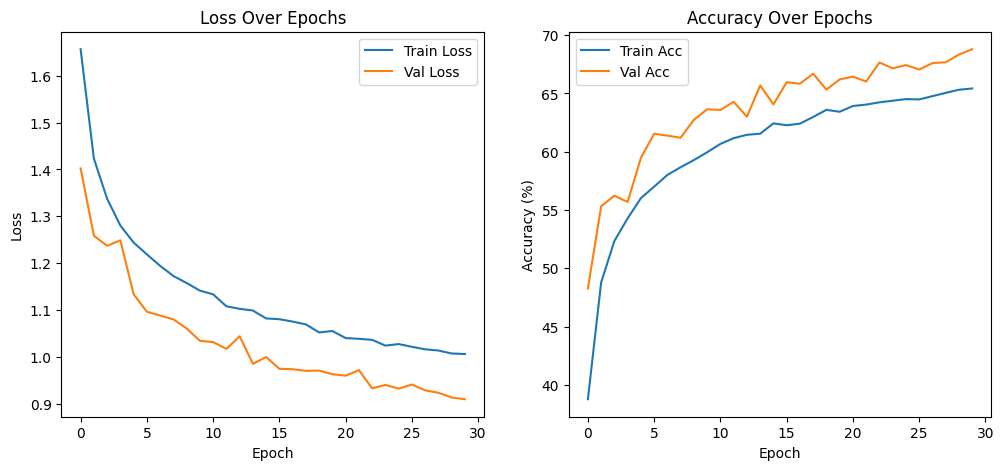

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies, label="Train Acc")
plt.plot(val_accuracies, label="Val Acc")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()


In [15]:
torch.save(net.state_dict(), 'trained_net.pth')

In [16]:
net = NeuralNetwork()
net.load_state_dict(torch.load('trained_net.pth'))

<All keys matched successfully>

In [17]:
correct = 0
total = 0

net.eval()

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')

Accuracy: 68.79%


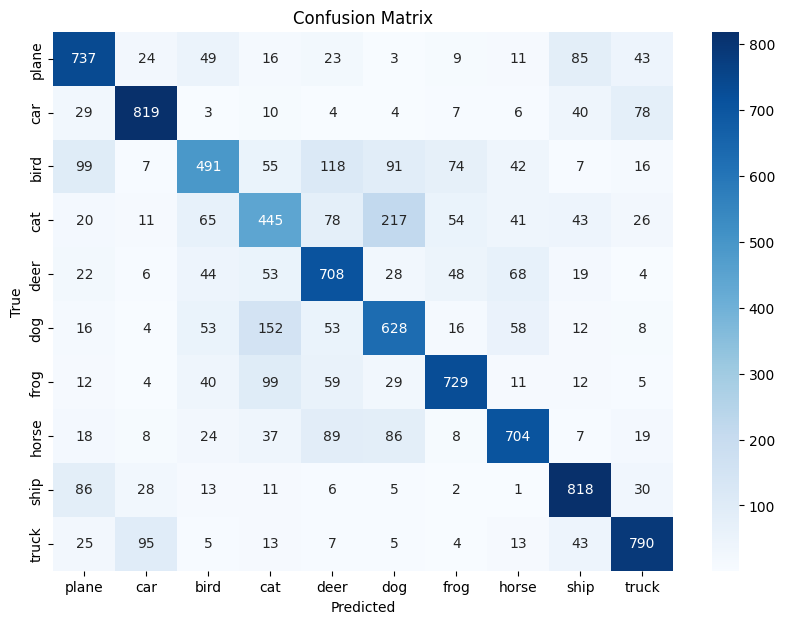

              precision    recall  f1-score   support

       plane       0.69      0.74      0.71      1000
         car       0.81      0.82      0.82      1000
        bird       0.62      0.49      0.55      1000
         cat       0.50      0.45      0.47      1000
        deer       0.62      0.71      0.66      1000
         dog       0.57      0.63      0.60      1000
        frog       0.77      0.73      0.75      1000
       horse       0.74      0.70      0.72      1000
        ship       0.75      0.82      0.78      1000
       truck       0.78      0.79      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Collect predictions
all_preds = []
all_labels = []

net.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(all_labels, all_preds, target_names=class_names))
